# Exploring NYC Neighborhoods for Food and Resturant Service
##### by Fitsum Habte

### Import Required Python Packages

In [3]:
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize

import folium
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

### Set Foursquare API Credentials

In [4]:
CLIENT_ID = '2WKQSVAL4GZV1T2ALQFNQFKEZEG13DFIOJ4A3A0IKOUAKZ35' # your Foursquare ID
CLIENT_SECRET = 'Q1CZF3ZKNU1S5XEZFGBIXQDMNADNDNNRY1CKOV1PUP40D5RH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2WKQSVAL4GZV1T2ALQFNQFKEZEG13DFIOJ4A3A0IKOUAKZ35
CLIENT_SECRET:Q1CZF3ZKNU1S5XEZFGBIXQDMNADNDNNRY1CKOV1PUP40D5RH


### Import NYC Neighborhood Name & Location Data Hosted From NYU's Spatial Data Repository website

In [5]:
with open('NYC data set.json') as json_data:
    newyork_data = json.load(json_data)
nyc_neighborhood_data = newyork_data['features']
nyc_neighborhood_data[5]

{'type': 'Feature',
 'id': 'nyu_2451_34572.6',
 'geometry': {'type': 'Point',
  'coordinates': [-73.90281798724604, 40.88168737120521]},
 'geometry_name': 'geom',
 'properties': {'name': 'Kingsbridge',
  'stacked': 1,
  'annoline1': 'Kingsbridge',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.90281798724604,
   40.88168737120521,
   -73.90281798724604,
   40.88168737120521]}}

In [6]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

nyc_neighborhoods = pd.DataFrame(columns=column_names)

for data in nyc_neighborhood_data:
    borough = nyc_neighborhood_data = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    nyc_neighborhoods = nyc_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
nyc_neighborhoods.head(5)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


### Retrieve Food-Related Venue Data From Foursquare

#### Foursquare Food -Related Venue CategoryIDs with their name

1. Afghan Restaurant- 503288ae91d4c4b30a586d67
2. African Restaurant- 4bf58dd8d48988d1c8941735
3. American Restaurant- 4bf58dd8d48988d14e941735
4. Asian Restaurant	4bf58dd8d48988d142941735
5. Filipino Restaurant	4eb1bd1c3b7b55596b4a748f
6. Himalayan Restaurant	52e81612bcbc57f1066b79fb
7. Hotpot Restaurant	52af0bd33cf9994f4e043bdd
8. Indonesian Restaurant	4deefc054765f83613cdba6f
9. Japanese Restaurant	4bf58dd8d48988d111941735
10. Korean Restaurant	4bf58dd8d48988d113941735
11. Malay Restaurant	4bf58dd8d48988d156941735
12. Mongolian Restaurant	4eb1d5724b900d56c88a45fe
13. Noodle House	4bf58dd8d48988d1d1941735
14. Satay Restaurant	56aa371be4b08b9a8d57350e
15. Thai Restaurant	4bf58dd8d48988d149941735
16. Tibetan Restaurant	52af39fb3cf9994f4e043be9
17. Australian Restaurant	4bf58dd8d48988d169941735
18. Austrian Restaurant	52e81612bcbc57f1066b7a01
19. BBQ Joint	4bf58dd8d48988d1df931735
20. Bagel Shop	4bf58dd8d48988d179941735
21. Bakery	4bf58dd8d48988d16a941735
22. Belgian Restaurant	52e81612bcbc57f1066b7a02
23. Bistro	52e81612bcbc57f1066b79f1
24. Breakfast Spot	4bf58dd8d48988d143941735
25. Bubble Tea Shop	52e81612bcbc57f1066b7a0c
26. Buffet	52e81612bcbc57f1066b79f4
27. Burger Joint	4bf58dd8d48988d16c941735
28. Cafeteria	4bf58dd8d48988d128941735
29. Café	4bf58dd8d48988d16d941735
30. Cajun / Creole Restaurant	4bf58dd8d48988d17a941735
31. Caribbean Restaurant	4bf58dd8d48988d144941735
32. Caucasian Restaurant	5293a7d53cf9994f4e043a45
33. Coffee Shop	4bf58dd8d48988d1e0931735
34. Comfort Food Restaurant	52e81612bcbc57f1066b7a00
35. Creperie	52e81612bcbc57f1066b79f2
36. Czech Restaurant	52f2ae52bcbc57f1066b8b81
37. Deli / Bodega	4bf58dd8d48988d146941735
38. Dessert Shop	4bf58dd8d48988d1d0941735
39. Diner	4bf58dd8d48988d147941735
40. Donut Shop	4bf58dd8d48988d148941735
41. Dumpling Restaurant	4bf58dd8d48988d108941735
42. Dutch Restaurant	5744ccdfe4b0c0459246b4d0
43. Eastern European Restaurant	4bf58dd8d48988d109941735
44. English Restaurant	52e81612bcbc57f1066b7a05
45. Falafel Restaurant	4bf58dd8d48988d10b941735
46. Fast Food Restaurant	4bf58dd8d48988d16e941735
47. Fish & Chips Shop	4edd64a0c7ddd24ca188df1a
48. Fondue Restaurant	52e81612bcbc57f1066b7a09
49. Food Court	4bf58dd8d48988d120951735
50. Food Stand	56aa371be4b08b9a8d57350b
51. Food Truck	4bf58dd8d48988d1cb941735
52. French Restaurant	4bf58dd8d48988d10c941735
53. Fried Chicken Joint	4d4ae6fc7a7b7dea34424761
54. Friterie	55d25775498e9f6a0816a37a
55. Gastropub	4bf58dd8d48988d155941735
56. German Restaurant	4bf58dd8d48988d10d941735
57. Gluten-free Restaurant	4c2cd86ed066bed06c3c5209
58. Greek Restaurant	4bf58dd8d48988d10e941735
59. Halal Restaurant	52e81612bcbc57f1066b79ff
60. Hawaiian Restaurant	52e81612bcbc57f1066b79fe
61. Hot Dog Joint	4bf58dd8d48988d16f941735
62. Hungarian Restaurant	52e81612bcbc57f1066b79fa
63. Indian Restaurant	4bf58dd8d48988d10f941735
64. Irish Pub	52e81612bcbc57f1066b7a06
65. Italian Restaurant	4bf58dd8d48988d110941735
66. Jewish Restaurant	52e81612bcbc57f1066b79fd
67. Juice Bar	4bf58dd8d48988d112941735
68. Kebab Restaurant	5283c7b4e4b094cb91ec88d7
69. Latin American Restaurant	4bf58dd8d48988d1be941735
70. Mac & Cheese Joint	4bf58dd8d48988d1bf941735
71. Mediterranean Restaurant	4bf58dd8d48988d1c0941735
72. Mexican Restaurant	4bf58dd8d48988d1c1941735
73. Middle Eastern Restaurant	4bf58dd8d48988d115941735
74. Modern European Restaurant	52e81612bcbc57f1066b79f9
75. Molecular Gastronomy Restaurant	4bf58dd8d48988d1c2941735
76. Pakistani Restaurant	52e81612bcbc57f1066b79f8
77. Pet Café	56aa371be4b08b9a8d573508
78. Pizza Place	4bf58dd8d48988d1ca941735
79. Polish Restaurant	52e81612bcbc57f1066b7a04
80. Portuguese Restaurant	4def73e84765ae376e57713a
81. Poutine Place	56aa371be4b08b9a8d5734c7
82. Restaurant	4bf58dd8d48988d1c4941735
83. Russian Restaurant	5293a7563cf9994f4e043a44
84. Salad Place	4bf58dd8d48988d1bd941735
85. Sandwich Place	4bf58dd8d48988d1c5941735
86. Scandinavian Restaurant	4bf58dd8d48988d1c6941735
87. Scottish Restaurant	5744ccdde4b0c0459246b4a3
88. Seafood Restaurant	4bf58dd8d48988d1ce941735
89. Slovak Restaurant	56aa371be4b08b9a8d57355a
90. Snack Place	4bf58dd8d48988d1c7941735
91. Soup Place	4bf58dd8d48988d1dd931735
92. Southern / Soul Food Restaurant	4bf58dd8d48988d14f941735
93. Spanish Restaurant	4bf58dd8d48988d150941735
94. Sri Lankan Restaurant	5413605de4b0ae91d18581a9
95. Steakhouse	4bf58dd8d48988d1cc941735
96. Swiss Restaurant	4bf58dd8d48988d158941735
97. Tea Room	4bf58dd8d48988d1dc931735
98. Theme Restaurant	56aa371be4b08b9a8d573538
99. Truck Stop	57558b36e4b065ecebd306dd
100. Turkish Restaurant	4f04af1f2fb6e1c99f3db0bb
101. Ukrainian Restaurant	52e928d0bcbc57f1066b7e96
102. Vegetarian / Vegan Restaurant	4bf58dd8d48988d1d3941735
103. Wings Joint	4bf58dd8d48988d14c941735


#### Let's define a Function that will create API Url

In [7]:
def createURL(endpoint, CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, categoryId, limit):
    url = '{}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            endpoint,
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            categoryId,
            limit
        )
    return url

endpoint = 'https://api.foursquare.com/v2/venues/search?'
categoryIds = ['503288ae91d4c4b30a586d67',
'4bf58dd8d48988d1c8941735',
'4bf58dd8d48988d14e941735',
'4bf58dd8d48988d142941735',
'4eb1bd1c3b7b55596b4a748f',
'52e81612bcbc57f1066b79fb',
'52af0bd33cf9994f4e043bdd',
'4deefc054765f83613cdba6f',
'4bf58dd8d48988d111941735',
'4bf58dd8d48988d113941735',
'4bf58dd8d48988d156941735',
'4eb1d5724b900d56c88a45fe',
'4bf58dd8d48988d1d1941735',
'56aa371be4b08b9a8d57350e',
'4bf58dd8d48988d149941735',
'52af39fb3cf9994f4e043be9',
'4bf58dd8d48988d169941735',
'52e81612bcbc57f1066b7a01',
'4bf58dd8d48988d1df931735',
'4bf58dd8d48988d179941735',
'4bf58dd8d48988d16a941735',
'52e81612bcbc57f1066b7a02',
'52e81612bcbc57f1066b79f1',
'4bf58dd8d48988d143941735',
'52e81612bcbc57f1066b7a0c',
'52e81612bcbc57f1066b79f4',
'4bf58dd8d48988d16c941735',
'4bf58dd8d48988d128941735',
'4bf58dd8d48988d16d941735',
'4bf58dd8d48988d17a941735',
'4bf58dd8d48988d144941735',
'5293a7d53cf9994f4e043a45',
'4bf58dd8d48988d1e0931735',
'52e81612bcbc57f1066b7a00',
'52e81612bcbc57f1066b79f2',
'52f2ae52bcbc57f1066b8b81',
'4bf58dd8d48988d146941735',
'4bf58dd8d48988d1d0941735',
'4bf58dd8d48988d147941735',
'4bf58dd8d48988d148941735',
'4bf58dd8d48988d108941735',
'5744ccdfe4b0c0459246b4d0',
'4bf58dd8d48988d109941735',
'52e81612bcbc57f1066b7a05',
'4bf58dd8d48988d10b941735',
'4bf58dd8d48988d16e941735',
'4edd64a0c7ddd24ca188df1a',
'52e81612bcbc57f1066b7a09',
'4bf58dd8d48988d120951735',
'56aa371be4b08b9a8d57350b',
'4bf58dd8d48988d1cb941735',
'4bf58dd8d48988d10c941735',
'4d4ae6fc7a7b7dea34424761',
'55d25775498e9f6a0816a37a',
'4bf58dd8d48988d155941735',
'4bf58dd8d48988d10d941735',
'4c2cd86ed066bed06c3c5209',
'4bf58dd8d48988d10e941735',
'52e81612bcbc57f1066b79ff',
'52e81612bcbc57f1066b79fe',
'4bf58dd8d48988d16f941735',
'52e81612bcbc57f1066b79fa',
'4bf58dd8d48988d10f941735',
'52e81612bcbc57f1066b7a06',
'4bf58dd8d48988d110941735',
'52e81612bcbc57f1066b79fd',
'4bf58dd8d48988d112941735',
'5283c7b4e4b094cb91ec88d7',
'4bf58dd8d48988d1be941735',
'4bf58dd8d48988d1bf941735',
'4bf58dd8d48988d1c0941735',
'4bf58dd8d48988d1c1941735',
'4bf58dd8d48988d115941735',
'52e81612bcbc57f1066b79f9',
'4bf58dd8d48988d1c2941735',
'52e81612bcbc57f1066b79f8',
'56aa371be4b08b9a8d573508',
'4bf58dd8d48988d1ca941735',
'52e81612bcbc57f1066b7a04',
'4def73e84765ae376e57713a',
'56aa371be4b08b9a8d5734c7',
'4bf58dd8d48988d1c4941735',
'5293a7563cf9994f4e043a44',
'4bf58dd8d48988d1bd941735',
'4bf58dd8d48988d1c5941735',
'4bf58dd8d48988d1c6941735',
'5744ccdde4b0c0459246b4a3',
'4bf58dd8d48988d1ce941735',
'56aa371be4b08b9a8d57355a',
'4bf58dd8d48988d1c7941735',
'4bf58dd8d48988d1dd931735',
'4bf58dd8d48988d14f941735',
'4bf58dd8d48988d150941735',
'5413605de4b0ae91d18581a9',
'4bf58dd8d48988d1cc941735',
'4bf58dd8d48988d158941735',
'4bf58dd8d48988d1dc931735',
'56aa371be4b08b9a8d573538',
'57558b36e4b065ecebd306dd',
'4f04af1f2fb6e1c99f3db0bb',
'52e928d0bcbc57f1066b7e96',
'4bf58dd8d48988d1d3941735',
'4bf58dd8d48988d14c941735']

categoryId = ','.join(categoryIds)
limit = 25

#### Function To Retrieve All Food-Related Venues Per Neighborhood


In [8]:
radius = 100
def getNearbyFoodVenues(neighborhoods, latitudes, longitudes, radius=100):
    endpoint = 'https://api.foursquare.com/v2/venues/search?'
    venues_list = []   
    
    for hood_name, lat, lng in zip(neighborhoods, latitudes, longitudes):
    
        url = createURL(endpoint, CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, categoryId, limit)
        
        results = requests.get(url).json()['response']['venues']

        for item in results:
            venue_name = item['name']
            venue_category = item['categories'][0]['name']
            venue_lat = item['location']['lat']
            venue_lng = item['location']['lng']
            try:
                venue_city = item['location']['city']
            except:
                venue_city = 'N/A'
            venue_state = item['location']['state']
            
            venues_list.append([(hood_name,
                                lat,
                                lng,
                                venue_name,
                                venue_category,
                                venue_lat,
                                venue_lng,
                                venue_city,
                                venue_state
                               )])
            
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Neighborhood Latitude',
                             'Neighborhood Longitude',
                             'Venue Name',
                             'Venue Category',
                             'Venue Latitude',
                             'Venue Longitude',
                             'Venue City',
                             'Venue State'
                            ]
    return nearby_venues

venues_data = getNearbyFoodVenues(nyc_neighborhoods['Neighborhood'],
                                         nyc_neighborhoods['Latitude'],
                                         nyc_neighborhoods['Longitude'],
                                         radius
                                        )


#### Calculating the number of venues We Retrieved?

In [9]:
print(venues_data.shape)
venues_data.head(5)


(1503, 9)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude,Venue City,Venue State
0,Kingsbridge,40.881687,-73.902818,Silhouette Restaurant & Lounge,Latin American Restaurant,40.880706,-73.902687,Bronx,NY
1,Kingsbridge,40.881687,-73.902818,Ocean Dip Seafood,Seafood Restaurant,40.880771,-73.903375,Bronx,NY
2,Kingsbridge,40.881687,-73.902818,Vickies Pizza,Pizza Place,40.881003,-73.903336,Bronx,NY
3,Woodlawn,40.898273,-73.867315,Rambling House,Pub,40.898439,-73.867197,Bronx,NY
4,Woodlawn,40.898273,-73.867315,Sean's Quality Deli,Deli / Bodega,40.897595,-73.867151,Bronx,NY


#### It is good procatice to sSave DataFrame As CSV To Avoid Further API Calls
(Currently commented out because the data has already been retrieved and saved to a csv file)

In [10]:
venues_data.to_csv(path_or_buf='venues_data.csv')

#### Loading the previously saved DataFrame from csv

In [11]:
venues_data = pd.read_csv('venues_data.csv', index_col=0)
venues_data.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude,Venue City,Venue State
0,Kingsbridge,40.881687,-73.902818,Silhouette Restaurant & Lounge,Latin American Restaurant,40.880706,-73.902687,Bronx,NY
1,Kingsbridge,40.881687,-73.902818,Ocean Dip Seafood,Seafood Restaurant,40.880771,-73.903375,Bronx,NY
2,Kingsbridge,40.881687,-73.902818,Vickies Pizza,Pizza Place,40.881003,-73.903336,Bronx,NY
3,Woodlawn,40.898273,-73.867315,Rambling House,Pub,40.898439,-73.867197,Bronx,NY
4,Woodlawn,40.898273,-73.867315,Sean's Quality Deli,Deli / Bodega,40.897595,-73.867151,Bronx,NY


### Exploratory Data Analysis

#### Check the states where the venues belongs in?

In [12]:
venues_data.groupby('Venue State')['Venue State'].count()

Venue State
NJ             2
NY          1463
New York      38
Name: Venue State, dtype: int64

There art 2 venues in NJ which is out of our focus area and needs to be deleted. There are 1463 NY wrtitten in short and 38 New York in long full word. We have to make similar.

#### The list and number of  venue categories in the dataframe?

In [13]:
n_unique = len(venues_data['Venue Category'].unique())
print(f'There are {n_unique} unique venue categories in this dataframe')
venues_data.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 121 unique venue categories in this dataframe


Venue Category
Deli / Bodega                    187
Pizza Place                      100
Food Truck                        86
Chinese Restaurant                81
Coffee Shop                       77
Bakery                            52
Café                              49
Italian Restaurant                48
American Restaurant               44
Mexican Restaurant                40
Ice Cream Shop                    34
Sandwich Place                    32
Restaurant                        29
Juice Bar                         27
Caribbean Restaurant              27
Diner                             26
Bagel Shop                        25
Korean Restaurant                 22
Burger Joint                      21
Dessert Shop                      20
Sushi Restaurant                  19
Thai Restaurant                   18
Donut Shop                        17
Fried Chicken Joint               17
Japanese Restaurant               16
Vegetarian / Vegan Restaurant     16
Fast Food Restaurant   

#### How many venues did not have their 'city' parameter filled-out?

In [14]:
n_unknown_cities = venues_data[venues_data['Venue City']=='N/A']['Venue Name'].count()
print(f'There were {n_unknown_cities} entries in the dataset without the "city" parameter filled-out')

There were 0 entries in the dataset without the "city" parameter filled-out


In [15]:
venues_data[venues_data['Venue City']=='N/A']['Venue Name'][0:5]

Series([], Name: Venue Name, dtype: object)

#### Are there any 'null' values in the dataset?

In [16]:
venues_data.isnull().values.any()

True

In [51]:
null_counts= venues_data.isnull()
print(null_counts)

      Neighborhood  Neighborhood Latitude  Neighborhood Longitude  Venue Name  \
0            False                  False                   False       False   
1            False                  False                   False       False   
2            False                  False                   False       False   
3            False                  False                   False       False   
4            False                  False                   False       False   
5            False                  False                   False       False   
6            False                  False                   False       False   
7            False                  False                   False       False   
8            False                  False                   False       False   
9            False                  False                   False       False   
10           False                  False                   False       False   
11           False          

In [52]:
null_counts= null_counts.sum(axis=0)
null_counts

Neighborhood               0
Neighborhood Latitude      0
Neighborhood Longitude     0
Venue Name                 0
Venue Category             0
Venue Latitude             0
Venue Longitude            0
Venue City                38
Venue State                0
dtype: int64

#### How many unique venues are there?

In [17]:
n_unique_venues = len(venues_data['Venue Name'].unique())
print(f'There are {n_unique_venues} unique venues in the venues dataset')

There are 1409 unique venues in the venues dataset


### Data Pre-Processing

#### Delet those entries other than city not equal to "New York" or "NY"

In [18]:
ny_venue_data = venues_data[(venues_data['Venue State'] == "New York") | (venues_data['Venue State'] == "NY")]
ny_venue_data['Venue State'].replace(to_replace="New York", value="NY", inplace=True)
delta = venues_data.shape[0] - ny_venue_data.shape[0]
print(f'{delta} entries were removed from the venue dataset based on "Venue State"')
ny_venue_data.head(5)

2 entries were removed from the venue dataset based on "Venue State"


C:\Users\f_mul\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude,Venue City,Venue State
0,Kingsbridge,40.881687,-73.902818,Silhouette Restaurant & Lounge,Latin American Restaurant,40.880706,-73.902687,Bronx,NY
1,Kingsbridge,40.881687,-73.902818,Ocean Dip Seafood,Seafood Restaurant,40.880771,-73.903375,Bronx,NY
2,Kingsbridge,40.881687,-73.902818,Vickies Pizza,Pizza Place,40.881003,-73.903336,Bronx,NY
3,Woodlawn,40.898273,-73.867315,Rambling House,Pub,40.898439,-73.867197,Bronx,NY
4,Woodlawn,40.898273,-73.867315,Sean's Quality Deli,Deli / Bodega,40.897595,-73.867151,Bronx,NY


#### Remove entries with "Venue City" equal to "N/A"

In [54]:
ny_venue_data_with_city = ny_venue_data[(ny_venue_data['Venue City'] != " ")]
delta = ny_venue_data.shape[0] - ny_venue_data_with_city.shape[0]
print(f'{delta} entries were removed based on "Venue City"')
ny_venue_data_with_city.head(20)

0 entries were removed based on "Venue City"


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude,Venue City,Venue State
0,Kingsbridge,40.881687,-73.902818,Silhouette Restaurant & Lounge,Latin American Restaurant,40.880706,-73.902687,Bronx,NY
1,Kingsbridge,40.881687,-73.902818,Ocean Dip Seafood,Seafood Restaurant,40.880771,-73.903375,Bronx,NY
2,Kingsbridge,40.881687,-73.902818,Vickies Pizza,Pizza Place,40.881003,-73.903336,Bronx,NY
3,Woodlawn,40.898273,-73.867315,Rambling House,Pub,40.898439,-73.867197,Bronx,NY
4,Woodlawn,40.898273,-73.867315,Sean's Quality Deli,Deli / Bodega,40.897595,-73.867151,Bronx,NY
5,Woodlawn,40.898273,-73.867315,Katonah Pizza and Pasta,Pizza Place,40.898784,-73.867457,Bronx,NY
6,Woodlawn,40.898273,-73.867315,Angelica's Bakery,Bakery,40.899183,-73.867553,Bronx,NY
7,Woodlawn,40.898273,-73.867315,Aqueduct North,Irish Pub,40.897812,-73.867533,Bronx,NY
8,Woodlawn,40.898273,-73.867315,Greenland Deli,Deli / Bodega,40.898933,-73.867546,Bronx,NY
9,Woodlawn,40.898273,-73.867315,Katonah Ave. Food Truck,Food Truck,40.898968,-73.867625,Bronx,NY


#### Remove entries that are not associated with food or resturant categories

In [20]:
food_related_categories = ['Afghan Restaurant',
'African Restaurant',
'American Restaurant',
'Asian Restaurant',
'Filipino Restaurant',
'Himalayan Restaurant',
'Hotpot Restaurant',
'Indonesian Restaurant',
'Japanese Restaurant',
'Korean Restaurant',
'Malay Restaurant',
'Mongolian Restaurant',
'Noodle House',
'Satay Restaurant',
'Thai Restaurant',
'Tibetan Restaurant',
'Australian Restaurant',
'Austrian Restaurant',
'BBQ Joint',
'Bagel Shop',
'Bakery',
'Belgian Restaurant',
'Bistro',
'Breakfast Spot',
'Bubble Tea Shop',
'Buffet',
'Burger Joint',
'Cafeteria',
'Café',
'Cajun / Creole Restaurant',
'Caribbean Restaurant',
'Caucasian Restaurant',
'Coffee Shop',
'Comfort Food Restaurant',
'Creperie',
'Czech Restaurant',
'Deli / Bodega',
'Dessert Shop',
'Diner',
'Donut Shop',
'Dumpling Restaurant',
'Dutch Restaurant',
'Eastern European Restaurant',
'English Restaurant',
'Falafel Restaurant',
'Fast Food Restaurant',
'Fish & Chips Shop',
'Fondue Restaurant',
'Food Court',
'Food Stand',
'Food Truck',
'French Restaurant',
'Fried Chicken Joint',
'Friterie',
'Gastropub',
'German Restaurant',
'Gluten-free Restaurant',
'Greek Restaurant',
'Halal Restaurant',
'Hawaiian Restaurant',
'Hot Dog Joint',
'Hungarian Restaurant',
'Indian Restaurant',
'Irish Pub',
'Italian Restaurant',
'Jewish Restaurant',
'Juice Bar',
'Kebab Restaurant',
'Latin American Restaurant',
'Mac & Cheese Joint',
'Mediterranean Restaurant',
'Mexican Restaurant',
'Middle Eastern Restaurant',
'Modern European Restaurant',
'Molecular Gastronomy Restaurant',
'Pakistani Restaurant',
'Pet Café',
'Pizza Place',
'Polish Restaurant'
'Portuguese Restaurant',
'Poutine Place',
'Restaurant',
'Russian Restaurant',
'Salad Place',
'Sandwich Place',
'Scandinavian Restaurant',
'Scottish Restaurant',
'Seafood Restaurant',
'Slovak Restaurant',
'Snack Place',
'Soup Place',
'Southern / Soul Food Restaurant',
'Spanish Restaurant',
'Sri Lankan Restaurant',
'Steakhouse',
'Swiss Restaurant',
'Tea Room',
'Theme Restaurant',
'Truck Stop',
'Turkish Restaurant',
'Ukrainian Restaurant',
'Vegetarian / Vegan Restaurant',
'Wings Joint']
ny_food_venues = ny_venue_data_with_city[ny_venue_data_with_city['Venue Category'].isin(food_related_categories)]
delta = ny_venue_data_with_city.shape[0] - ny_food_venues.shape[0]
print(f'{delta} entries were removed based on "Venue Category" not being related to food')
print(ny_food_venues['Venue Category'].unique())
ny_food_venues.head(5)

233 entries were removed based on "Venue Category" not being related to food
['Latin American Restaurant' 'Seafood Restaurant' 'Pizza Place'
 'Deli / Bodega' 'Bakery' 'Irish Pub' 'Food Truck' 'Sandwich Place'
 'Indian Restaurant' 'Café' 'Mexican Restaurant' 'Juice Bar' 'Coffee Shop'
 'Diner' 'French Restaurant' 'American Restaurant' 'Caribbean Restaurant'
 'Fast Food Restaurant' 'Fried Chicken Joint' 'Salad Place'
 'African Restaurant' 'Asian Restaurant' 'Fish & Chips Shop'
 'Italian Restaurant' 'Donut Shop' 'Spanish Restaurant' 'BBQ Joint'
 'Greek Restaurant' 'Mediterranean Restaurant' 'Caucasian Restaurant'
 'Thai Restaurant' 'Japanese Restaurant' 'Bagel Shop' 'Gastropub'
 'Vegetarian / Vegan Restaurant' 'Eastern European Restaurant'
 'Restaurant' 'Dessert Shop' 'Snack Place' 'Burger Joint'
 'Falafel Restaurant' 'Halal Restaurant' 'Hot Dog Joint' 'Breakfast Spot'
 'Middle Eastern Restaurant' 'Pet Café' 'Cajun / Creole Restaurant'
 'Kebab Restaurant' 'Southern / Soul Food Restaurant' 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude,Venue City,Venue State
0,Kingsbridge,40.881687,-73.902818,Silhouette Restaurant & Lounge,Latin American Restaurant,40.880706,-73.902687,Bronx,NY
1,Kingsbridge,40.881687,-73.902818,Ocean Dip Seafood,Seafood Restaurant,40.880771,-73.903375,Bronx,NY
2,Kingsbridge,40.881687,-73.902818,Vickies Pizza,Pizza Place,40.881003,-73.903336,Bronx,NY
4,Woodlawn,40.898273,-73.867315,Sean's Quality Deli,Deli / Bodega,40.897595,-73.867151,Bronx,NY
5,Woodlawn,40.898273,-73.867315,Katonah Pizza and Pasta,Pizza Place,40.898784,-73.867457,Bronx,NY


#### How many food venue entries are left?

In [21]:
n_entries = ny_food_venues.shape[0]
print(f'There are {n_entries} entries in the ny_food_venues dataframe')

There are 1268 entries in the ny_food_venues dataframe


#### How many unique food venues are left?

In [22]:
n_unique_entries = len(ny_food_venues['Venue Name'].unique())
print(f'There are {n_unique_entries} unique entries in the ny_food_venues dataframe')

There are 1185 unique entries in the ny_food_venues dataframe


#### One-Hot-Encode Venue Categories

In [23]:
ny_venue_category_onehot = pd.get_dummies(ny_food_venues[['Venue Category']], prefix="", prefix_sep="")

ny_venue_category_onehot['Neighborhood'] = ny_food_venues['Neighborhood'] 

fixed_columns = [ny_venue_category_onehot.columns[-1]] + list(ny_venue_category_onehot.columns[:-1])
ny_venue_category_onehot = ny_venue_category_onehot[fixed_columns]

print(ny_venue_category_onehot.shape)
ny_venue_category_onehot.head(10)

(1268, 73)


,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,...,Snack Place,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Tea Room,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
0,Kingsbridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kingsbridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kingsbridge,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Woodlawn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Woodlawn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Woodlawn,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Woodlawn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Woodlawn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Woodlawn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Woodlawn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Determine the total amount of venues of each category in each neighborhood

In [24]:
venue_counts = ny_venue_category_onehot.groupby('Neighborhood').sum()
venue_counts.head(10)

,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Breakfast Spot,Bubble Tea Shop,...,Snack Place,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Tea Room,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wings Joint
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allerton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arlington,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arrochar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Astoria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bath Beach,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Battery Park City,0,0,1,0,0,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Bay Ridge,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2,0,0,0
Bedford Stuyvesant,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bellerose,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


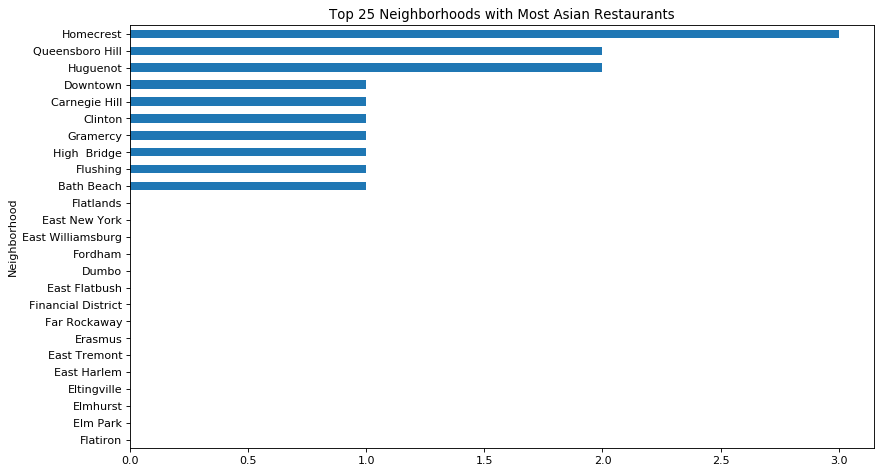

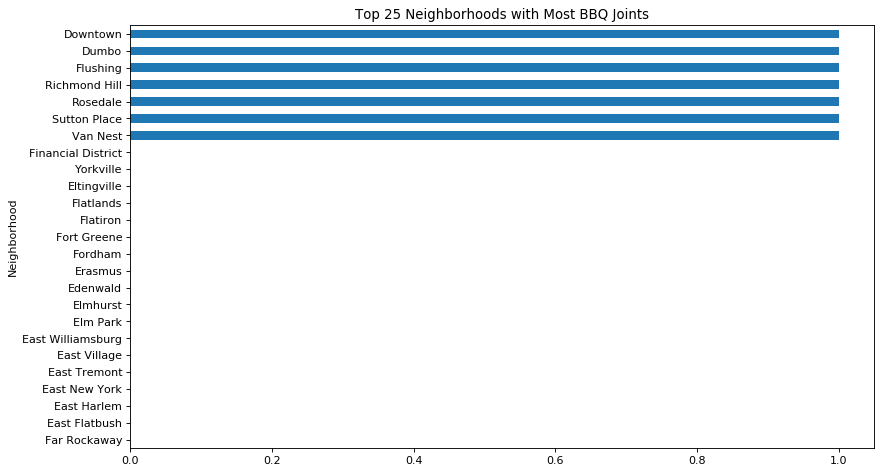

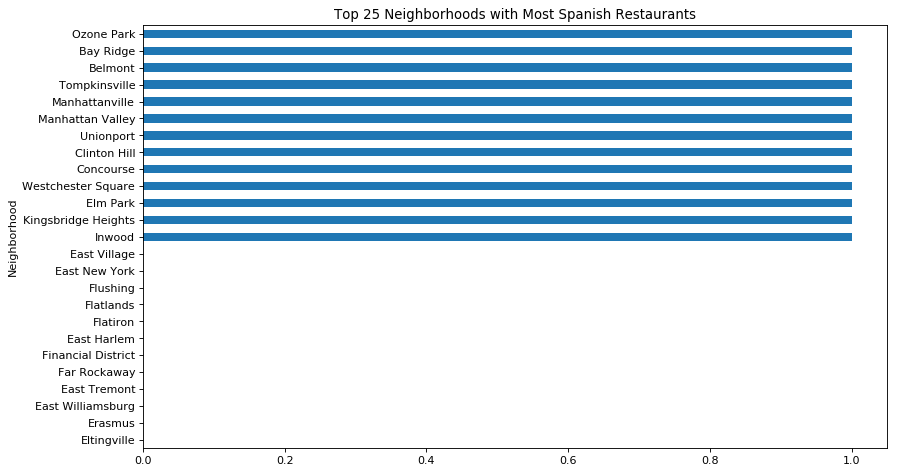

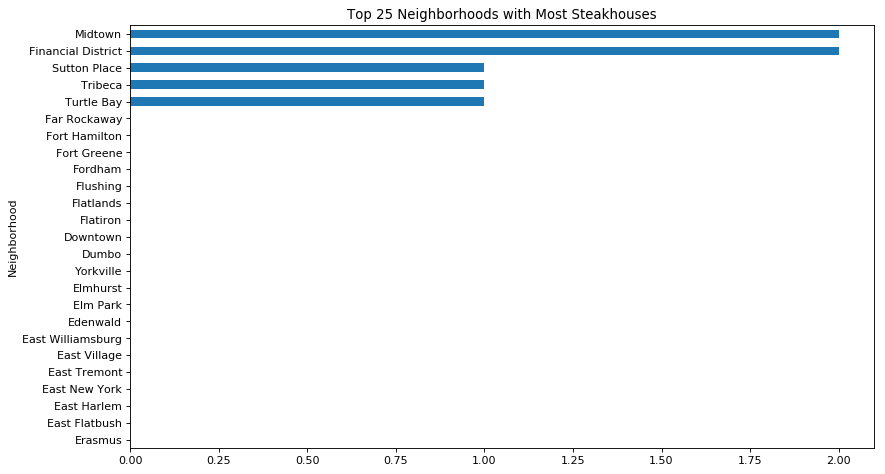

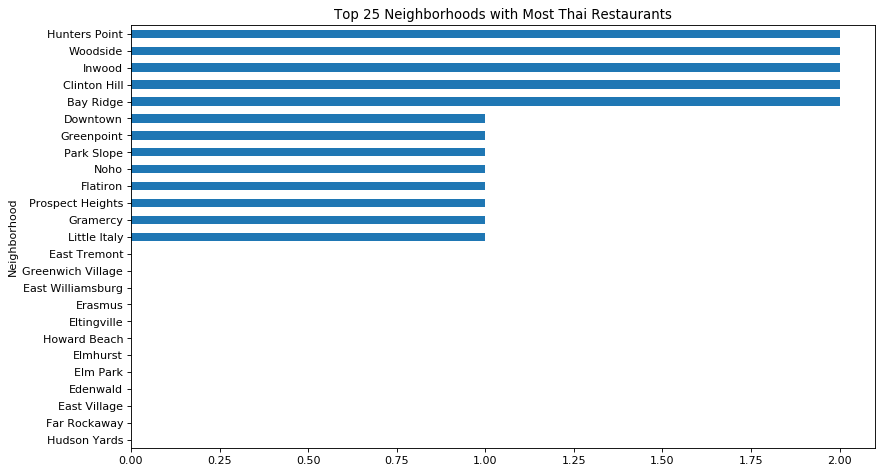

In [25]:
plot_categories = ['Asian Restaurant', 'BBQ Joint', 'Spanish Restaurant', 'Steakhouse', 'Thai Restaurant']
n = 25
for category in plot_categories:
    plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
    plt.title(f'Top {n} Neighborhoods with Most {category}s')
    top_category_neighborhoods = venue_counts[category].sort_values(ascending=False)[0:n]
    top_category_neighborhoods = top_category_neighborhoods.sort_values(ascending=True)
    top_category_neighborhoods.plot.barh(y=category, rot=0)

#### For each venue category, determine the percentage of entities in each neighborhood

In [27]:
venue_mean = pd.DataFrame()
for category, total in venue_totals.items():
    venue_mean[category] = venue_counts[category].apply(lambda x: x / total)
venue_mean = venue_mean.reindex(sorted(venue_mean.columns), axis=1).reset_index()
venue_mean.head(5)

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Asian Restaurant,Filipino Restaurant,Himalayan Restaurant,Hotpot Restaurant
0,Allerton,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,Arlington,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,Arrochar,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,Astoria,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,Bath Beach,0.0,0.0,0.0,0.071429,0.0,0.0,0.0


#### Creating a dataframe that shows the top 5 venue categories each neighborhood is known for

In [28]:
def return_top_venue_categories(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Top Venue Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Top Venue Category'.format(ind+1))

neighborhoods_top_venue_categories = pd.DataFrame(columns=columns)
neighborhoods_top_venue_categories['Neighborhood'] = venue_mean['Neighborhood']

for ind in np.arange(venue_mean.shape[0]):
    neighborhoods_top_venue_categories.iloc[ind, 1:] = return_top_venue_categories(venue_mean.iloc[ind, :], num_top_venues)

neighborhoods_top_venue_categories.head(5)

,Neighborhood,1st Top Venue Category,2nd Top Venue Category,3rd Top Venue Category,4th Top Venue Category,5th Top Venue Category
0,Allerton,Hotpot Restaurant,Himalayan Restaurant,Filipino Restaurant,Asian Restaurant,American Restaurant
1,Arlington,Hotpot Restaurant,Himalayan Restaurant,Filipino Restaurant,Asian Restaurant,American Restaurant
2,Arrochar,Hotpot Restaurant,Himalayan Restaurant,Filipino Restaurant,Asian Restaurant,American Restaurant
3,Astoria,Hotpot Restaurant,Himalayan Restaurant,Filipino Restaurant,Asian Restaurant,American Restaurant
4,Bath Beach,Asian Restaurant,Hotpot Restaurant,Himalayan Restaurant,Filipino Restaurant,American Restaurant


### Create a KMeans Model To Cluster Neighborhoods

In [50]:
kclusters = 15

venue_grouped_clustering = venue_mean.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(venue_grouped_clustering)

kmeans.labels_

array([ 0,  0,  0,  0,  7,  8,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  7,  0,  0,  0,  8,  0,  0,  0,  8,  0,  0,  0,  7,
        0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0, 12,  0,  0,  0,  0,
        5,  4,  0,  0,  0,  0,  0,  0,  0,  8,  8,  0,  7,  0,  0,  0,  0,
        0, 11,  0,  0,  0, 12,  8,  0,  0,  8,  8,  0,  7,  0, 10,  0,  0,
        6,  0, 14,  8,  0,  0,  0,  0,  0,  8,  1,  0,  2,  8,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  9, 11,  0,  0,  0,  0,  0,  0,  8,  0,  5,
        3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,
        0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,
        0,  8,  0,  8,  0,  0,  8,  0,  0,  0,  0,  8,  0,  8,  0,  0,  4,
        8,  0,  0, 11,  0,  0,  0,  0,  0,  0, 13,  0])

#### Creating a new dataframe merging neighborhood location data, top venue category by neighborhood, and cluster labels

In [35]:
#neighborhoods_top_venue_categories.insert(1,'Cluster Labels', kmeans.labels_)

ny_neighborhood_food_profile = nyc_neighborhoods.drop(columns=['Borough'])

ny_neighborhood_food_profile = ny_neighborhood_food_profile.join(neighborhoods_top_venue_categories.set_index('Neighborhood'), on='Neighborhood').dropna(axis=0)

ny_neighborhood_food_profile.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Top Venue Category,2nd Top Venue Category,3rd Top Venue Category,4th Top Venue Category,5th Top Venue Category
5,Kingsbridge,40.881687,-73.902818,0.0,Hotpot Restaurant,Himalayan Restaurant,Filipino Restaurant,Asian Restaurant,American Restaurant
7,Woodlawn,40.898273,-73.867315,0.0,Hotpot Restaurant,Himalayan Restaurant,Filipino Restaurant,Asian Restaurant,American Restaurant
8,Norwood,40.877224,-73.879391,0.0,Hotpot Restaurant,Himalayan Restaurant,Filipino Restaurant,Asian Restaurant,American Restaurant
9,Williamsbridge,40.881039,-73.857446,0.0,Hotpot Restaurant,Himalayan Restaurant,Filipino Restaurant,Asian Restaurant,American Restaurant
12,City Island,40.847247,-73.786488,8.0,American Restaurant,Hotpot Restaurant,Himalayan Restaurant,Filipino Restaurant,Asian Restaurant


#### Creating A Visualization of The Clusters

In [ ]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors
latitude = 40.730610
longitude = -73.935242
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.45)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_neighborhood_food_profile['Latitude'], ny_neighborhood_food_profile['Longitude'], ny_neighborhood_food_profile['Neighborhood'], ny_neighborhood_food_profile['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examining Clusters

In [36]:
for cluster in range(0, kclusters):
    print(f'Cluster {cluster}:')
    print(ny_neighborhood_food_profile.loc[ny_neighborhood_food_profile['Cluster Labels'] == cluster, ny_neighborhood_food_profile.columns[[0] + list(range(4, ny_neighborhood_food_profile.shape[1]))]], end="\n\n\n")

Cluster 0:
          Neighborhood 1st Top Venue Category 2nd Top Venue Category  \
5          Kingsbridge      Hotpot Restaurant   Himalayan Restaurant   
7             Woodlawn      Hotpot Restaurant   Himalayan Restaurant   
8              Norwood      Hotpot Restaurant   Himalayan Restaurant   
9       Williamsbridge      Hotpot Restaurant   Himalayan Restaurant   
15      Morris Heights      Hotpot Restaurant   Himalayan Restaurant   
16             Fordham      Hotpot Restaurant   Himalayan Restaurant   
18          West Farms      Hotpot Restaurant   Himalayan Restaurant   
20             Melrose      Hotpot Restaurant   Himalayan Restaurant   
21          Mott Haven      Hotpot Restaurant   Himalayan Restaurant   
23            Longwood      Hotpot Restaurant   Himalayan Restaurant   
25          Morrisania      Hotpot Restaurant   Himalayan Restaurant   
26           Soundview      Hotpot Restaurant   Himalayan Restaurant   
32            Van Nest      Hotpot Restaurant   Himal

In [98]:
for cluster in range(0, kclusters):
    print(f'Cluster {cluster}:')
    print(ny_neighborhood_food_profile.loc[ny_neighborhood_food_profile['Cluster Labels'] == cluster, ny_neighborhood_food_profile.columns[[0] + list(range(4, ny_neighborhood_food_profile.shape[1]))]])

Cluster 0:
          Neighborhood 1st Top Venue Category 2nd Top Venue Category  \
5          Kingsbridge      Hotpot Restaurant   Himalayan Restaurant   
7             Woodlawn      Hotpot Restaurant   Himalayan Restaurant   
8              Norwood      Hotpot Restaurant   Himalayan Restaurant   
9       Williamsbridge      Hotpot Restaurant   Himalayan Restaurant   
15      Morris Heights      Hotpot Restaurant   Himalayan Restaurant   
16             Fordham      Hotpot Restaurant   Himalayan Restaurant   
18          West Farms      Hotpot Restaurant   Himalayan Restaurant   
20             Melrose      Hotpot Restaurant   Himalayan Restaurant   
21          Mott Haven      Hotpot Restaurant   Himalayan Restaurant   
23            Longwood      Hotpot Restaurant   Himalayan Restaurant   
25          Morrisania      Hotpot Restaurant   Himalayan Restaurant   
26           Soundview      Hotpot Restaurant   Himalayan Restaurant   
32            Van Nest      Hotpot Restaurant   Himal